In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-16.40610910753061 -132.85434079768123
71.57377419399191 166.1458367793466
16.043528955467792 -160.54732866490792
59.05932065452845 141.68102322501034
-30.9394495500908 31.80051268551574
-32.17302141851118 -48.149606470818014
-83.28706237786707 142.38779897534295
-9.737495235431467 -74.25700073883678
-27.891798636447398 113.97786677262769
85.75420746025438 79.67112032400917
75.64128911716108 -36.25889852997895
40.50622218978313 -146.64692839529914
-70.13015843428646 72.44268778087766
82.61465906575407 -90.52740546476198
57.62749771463072 14.48540112439008
32.20670559469721 147.813539612562
79.6097450432232 -88.00372173097828
37.18833385720659 120.48923101949958
-24.424225855581213 -13.786221249649202
-73.20411717484463 -73.55269091833362
57.907568596863825 -83.7436000988294
23.94580444906086 79.34510005595206
4.810619177616573 -115.34965412714288
18.110204363970922 -129.79823496125158
-84.52105380533948 120.99759689786009
-39.56614749692205 -129.18274016117886
11.692836225546273 -123.5

-35.07099537539386 -13.007590591892665
-39.89651766089063 -178.4035152397863
6.066192457751313 96.08245137245535
50.02588383315924 -82.16636384808562
-43.270997170330524 177.67812951420592
-3.5102209077279696 -2.152216772512901
32.62086236575291 28.704700334016024
-22.603178543324802 41.72746942525592
68.15172079400412 69.30925266109881
28.376461117895474 -34.68745301396979
66.7832618623064 48.82512659304979
-50.4406423736482 108.03003705041431
47.066019648780895 9.505444682416197
-4.990828391508927 -6.282202294790267
56.31190625896494 -163.15103730047394
81.79727282432941 -165.44700019605813
87.16978687780144 62.956782653339104
38.207644950654185 -77.95084259766999
2.489235726728694 108.02795960898209
-61.629001048074855 153.59284838461883
-84.2839568239044 -82.54504878625524
-64.42323597840007 -59.2445182748306
78.45250175507994 -37.155564118490474
-80.16995040061491 -177.0447887303795
-60.23342461632258 -139.57682089943367
-25.842015990842825 80.65352399939849
10.588381672777444 75.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and set to start at 1.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | makakilo city
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | campoverde
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | nassjo
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | zhaocheng
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | patharia
Processing Record 22 of Set 1 | san patricio
Processing

Processing Record 35 of Set 4 | rincon
Processing Record 36 of Set 4 | kropotkin
Processing Record 37 of Set 4 | amarante do maranhao
Processing Record 38 of Set 4 | mwinilunga
Processing Record 39 of Set 4 | garden city
Processing Record 40 of Set 4 | fort smith
Processing Record 41 of Set 4 | nueva loja
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | agidel
Processing Record 47 of Set 4 | tura
Processing Record 48 of Set 4 | saint-louis
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | kongolo
Processing Record 1 of Set 5 | natal
Processing Record 2 of Set 5 | storforshei
Processing Record 3 of Set 5 | buariki
City not found. Skipping...
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | santa cruz de tenerife
Processing Record 6 of Set 5 | aswan
Processing Record 7 of Set 5 | san severino mar

Processing Record 25 of Set 8 | taoudenni
Processing Record 26 of Set 8 | ucluelet
Processing Record 27 of Set 8 | severo-kurilsk
Processing Record 28 of Set 8 | berezovka
Processing Record 29 of Set 8 | hammonton
Processing Record 30 of Set 8 | kibala
Processing Record 31 of Set 8 | oranjestad
Processing Record 32 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 8 | anori
Processing Record 34 of Set 8 | benidorm
Processing Record 35 of Set 8 | baculin
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | leshukonskoye
Processing Record 38 of Set 8 | sergeyevka
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | otofuke
Processing Record 41 of Set 8 | aquiraz
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | yashkino
Processing Record 44 of Set 8 | natalio
Processing Record 45 of Set 8 | ngunguru
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | the valley
Processing Record 

Processing Record 15 of Set 12 | dunmore town
Processing Record 16 of Set 12 | senmonorom
City not found. Skipping...
Processing Record 17 of Set 12 | saqqez
Processing Record 18 of Set 12 | russell
Processing Record 19 of Set 12 | tucupita
Processing Record 20 of Set 12 | fallon
Processing Record 21 of Set 12 | verkhoyansk
Processing Record 22 of Set 12 | maputo
Processing Record 23 of Set 12 | baykit
Processing Record 24 of Set 12 | san carlos de bariloche
Processing Record 25 of Set 12 | beckley
Processing Record 26 of Set 12 | sakaiminato
Processing Record 27 of Set 12 | rudbar
Processing Record 28 of Set 12 | bhuj
Processing Record 29 of Set 12 | corrente
Processing Record 30 of Set 12 | denpasar
Processing Record 31 of Set 12 | mar del plata
Processing Record 32 of Set 12 | that phanom
Processing Record 33 of Set 12 | dingle
Processing Record 34 of Set 12 | saint-augustin
Processing Record 35 of Set 12 | san francisco
Processing Record 36 of Set 12 | katghora
Processing Record 37

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,68.38,64,0,15.64,PF,2022-10-12 21:56:33
1,Bilibino,68.0546,166.4372,0.09,95,97,2.89,RU,2022-10-12 21:56:33
2,Makakilo City,21.3469,-158.0858,84.61,61,100,4.47,US,2022-10-12 21:56:34
3,Okhotsk,59.3833,143.3000,28.87,64,0,11.63,RU,2022-10-12 21:56:34
4,Cidreira,-30.1811,-50.2056,61.75,87,90,7.47,BR,2022-10-12 21:56:35
5,Hobart,-42.8794,147.3294,61.27,81,100,18.41,AU,2022-10-12 21:56:36
6,Campoverde,-8.4753,-74.8058,92.89,30,62,1.23,PE,2022-10-12 21:56:36
7,Geraldton,-28.7667,114.6000,46.81,87,0,8.05,AU,2022-10-12 21:56:37
8,Dikson,73.5069,80.5464,29.46,72,100,4.00,RU,2022-10-12 21:56:37
9,Tasiilaq,65.6145,-37.6368,27.41,93,100,2.08,GL,2022-10-12 21:56:38


In [11]:
new_column_order = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df = new_column_order

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-10-12 21:56:33,-23.1203,-134.9692,68.38,64,0,15.64
1,Bilibino,RU,2022-10-12 21:56:33,68.0546,166.4372,0.09,95,97,2.89
2,Makakilo City,US,2022-10-12 21:56:34,21.3469,-158.0858,84.61,61,100,4.47
3,Okhotsk,RU,2022-10-12 21:56:34,59.3833,143.3000,28.87,64,0,11.63
4,Cidreira,BR,2022-10-12 21:56:35,-30.1811,-50.2056,61.75,87,90,7.47


In [12]:
# Create the output file (CSV).
output_data_file = "weather-data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

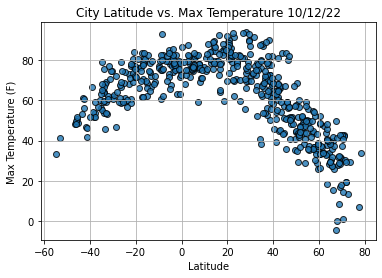

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig1.png")

# Show plot.
plt.show()

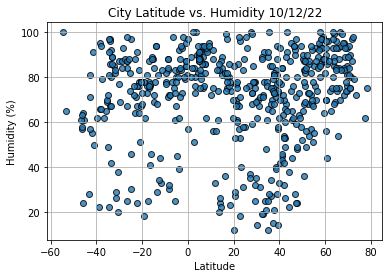

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig2.png")
# Show plot.
plt.show()

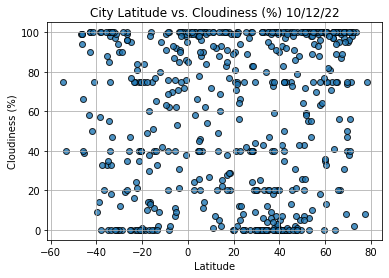

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig3.png")
# Show plot.
plt.show()

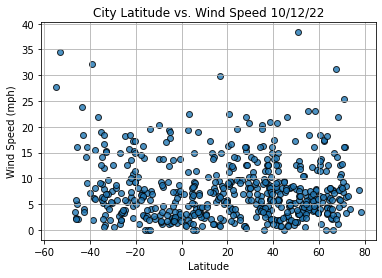

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bilibino,RU,2022-10-12 21:56:33,68.0546,166.4372,0.09,95,97,2.89
2,Makakilo City,US,2022-10-12 21:56:34,21.3469,-158.0858,84.61,61,100,4.47
3,Okhotsk,RU,2022-10-12 21:56:34,59.3833,143.3000,28.87,64,0,11.63
8,Dikson,RU,2022-10-12 21:56:37,73.5069,80.5464,29.46,72,100,4.00
9,Tasiilaq,GL,2022-10-12 21:56:38,65.6145,-37.6368,27.41,93,100,2.08


In [21]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-10-12 21:56:33,-23.1203,-134.9692,68.38,64,0,15.64
4,Cidreira,BR,2022-10-12 21:56:35,-30.1811,-50.2056,61.75,87,90,7.47
5,Hobart,AU,2022-10-12 21:56:36,-42.8794,147.3294,61.27,81,100,18.41
6,Campoverde,PE,2022-10-12 21:56:36,-8.4753,-74.8058,92.89,30,62,1.23
7,Geraldton,AU,2022-10-12 21:56:37,-28.7667,114.6000,46.81,87,0,8.05


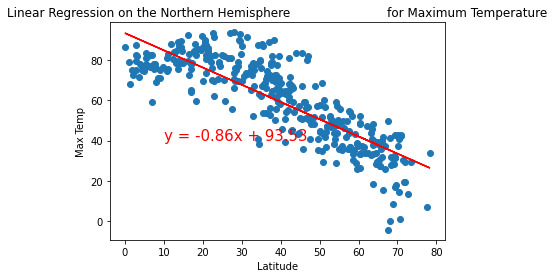

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

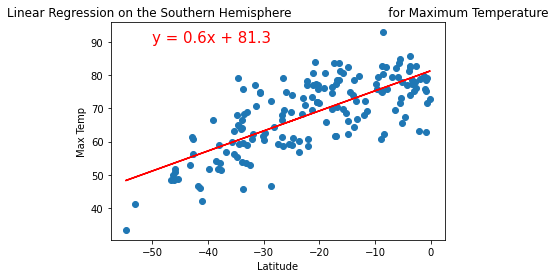

In [33]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

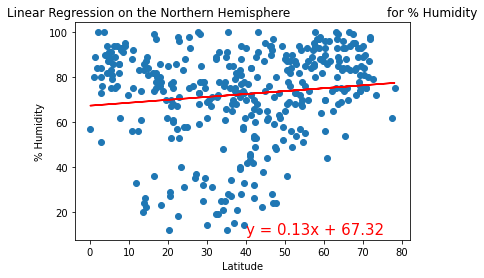

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

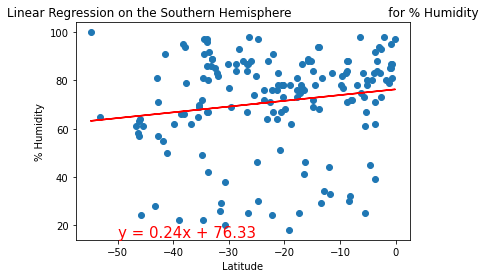

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

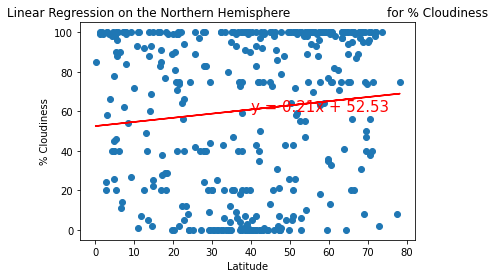

In [36]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))


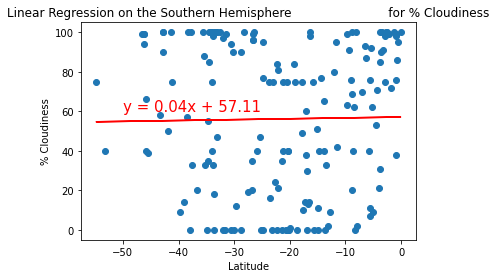

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

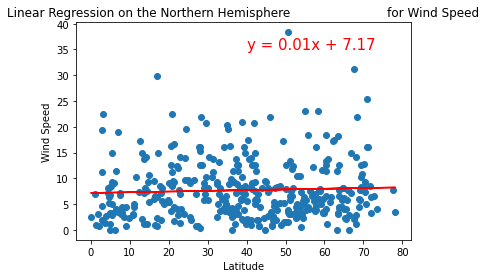

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

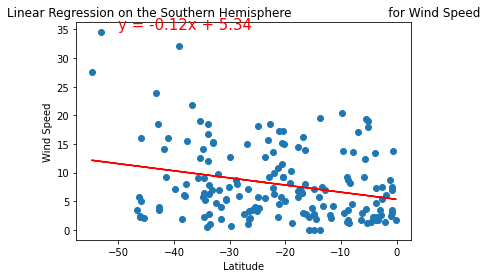

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))